<a href="https://colab.research.google.com/github/SameerChatbot/learning_rasa/blob/master/learning_rasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level='INFO')
warnings.filterwarnings('ignore')

def pprint(o):
  print(json.dumps(o, indent=2))

In [3]:
import sys
python = sys.executable

!{python} -m pip install -r 'https://raw.githubusercontent.com/RasaHQ/starter-pack-rasa-stack/master/requirements.txt'

!{python} -m spacy download en_core_web_md;
!{python} -m spacy link --force en_core_web_md en;

    100% |████████████████████████████████| 71kB 2.9MB/s 
    100% |████████████████████████████████| 71kB 5.1MB/s 
    100% |████████████████████████████████| 12.2MB 2.7MB/s 
    100% |████████████████████████████████| 645kB 26.0MB/s 
    100% |████████████████████████████████| 61kB 18.4MB/s 
    100% |████████████████████████████████| 348kB 30.3MB/s 
    100% |████████████████████████████████| 58.4MB 613kB/s 
    100% |████████████████████████████████| 5.4MB 9.0MB/s 
    100% |████████████████████████████████| 61kB 24.6MB/s 
    100% |████████████████████████████████| 51kB 19.9MB/s 
    100% |████████████████████████████████| 1.6MB 13.3MB/s 
    100% |████████████████████████████████| 51kB 21.5MB/s 
    100% |████████████████████████████████| 12.4MB 3.1MB/s 
    100% |████████████████████████████████| 153kB 34.3MB/s 
    100% |████████████████████████████████| 112kB 35.6MB/s 
    100% |████████████████████████████████| 1.7MB 15.8MB/s 
    100% |████████████████████████████████| 512kB

In [4]:
import rasa_nlu
import rasa_core
import spacy

print('rasa_core {} , rasa_nlu {} '.format(rasa_core.__version__, rasa_nlu.__version__))
print('loading spacy data model')
print(spacy.load('en')('hello world!'))

rasa_core 0.12.4 , rasa_nlu 0.13.8 
loading spacy data model
hello world!


In [5]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;

Selecting previously unselected package libgtk2.0-common.
(Reading database ... 131352 files and directories currently installed.)
Preparing to unpack .../0-libgtk2.0-common_2.24.32-1ubuntu1_all.deb ...
Unpacking libgtk2.0-common (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgtk2.0-0:amd64.
Preparing to unpack .../1-libgtk2.0-0_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgtk2.0-0:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail18:amd64.
Preparing to unpack .../2-libgail18_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail18:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail-common:amd64.
Preparing to unpack .../3-libgail-common_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail-common:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libxdot4.
Preparing to unpack .../4-libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting previously unselected package libgvc6-plugins-gtk.
Prep

In [6]:
!{python} -m pip install pygraphviz;

    100% |████████████████████████████████| 122kB 3.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/65/54/69/1aee9e66ab19916293208d4c9de0d3898adebe6b2eeff6476b
Successfully built pygraphviz


In [7]:
nlu_md = """
## intent:greet
- hey I am [Peter](PERSON)
- hello there I am [Hans](PERSON)
- hi I am [Tom](PERSON)
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- so sad
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


In [8]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                                     # loads the spacy language model
- name: "tokenizer_spacy"                               # splits sentences into tokens
- name: "ner_spacy"                                     # uses pretrained spacy NER model
- name: "intent_featurizer_spacy"                       # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"                       # uses the vector representation to classify using SVM
"""

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


In [9]:
from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config

training_data = load_data('nlu.md')
trainer = Trainer(config.load('config.yml'))
interpreter = trainer.train(training_data)
model_directory = trainer.persist('model/nlu', fixed_model_name='current')

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 68 (6 distinct intents)
	- Found intents: 'greet', 'mood_affirm', 'goodbye', 'mood_great', 'mood_unhappy', 'mood_deny'
	- entity examples: 3 (1 distinct entities)
	- found entities: 'PERSON'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train componen

Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [10]:
pprint(interpreter.parse('doing great'))

{
  "intent": {
    "name": "mood_great",
    "confidence": 0.643935028617438
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "mood_great",
      "confidence": 0.643935028617438
    },
    {
      "name": "mood_unhappy",
      "confidence": 0.09432991955289657
    },
    {
      "name": "goodbye",
      "confidence": 0.08752495948532607
    },
    {
      "name": "mood_affirm",
      "confidence": 0.062248049977635764
    },
    {
      "name": "greet",
      "confidence": 0.05708271441402627
    },
    {
      "name": "mood_deny",
      "confidence": 0.05487932795267692
    }
  ],
  "text": "doing great"
}


INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 68 (6 distinct intents)
	- Found intents: 'greet', 'mood_affirm', 'goodbye', 'mood_great', 'mood_unhappy', 'mood_deny'
	- entity examples: 3 (1 distinct entities)
	- found entities: 'PERSON'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 68 examples that have a defined intent out of 68 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9852163087457204
INFO:rasa_nlu.evaluate:Precision: 0.986344537815126
INFO:rasa_nlu.evaluate:Accuracy:  0.9852941176470589
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

     goodbye       1.00      0.91      0.95        11
       greet       0.93      1.00      0.96        13
 mood_affirm       1.00    

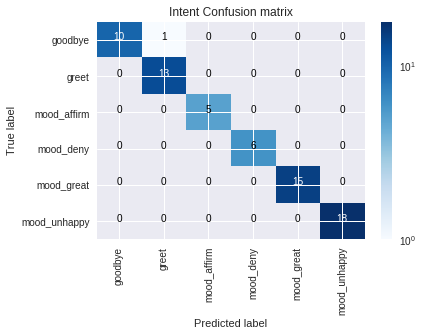

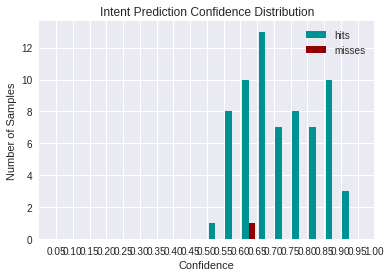

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_spacy 
INFO:rasa_nlu.evaluate:F1-Score:  0.970857463104801
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  0.9433962264150944
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

       DATE       0.00      0.00      0.00         0
     PERSON       1.00      1.00      1.00         3
       TIME       0.00      0.00      0.00         0
  no_entity       1.00      0.94      0.97       156

avg / total       1.00      0.94      0.97       159



In [11]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation('nlu.md', model_directory)

In [12]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - action_retrieve_image
  - utter_cheer_up
  - utter_did_that_help
* mood_affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - action_retrieve_image
  - utter_cheer_up
  - utter_did_that_help
* mood_deny
  - utter_goodbye
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


In [13]:
domain_yml = """
intents:
- greet
- goodbye
- mood_affirm
- mood_deny
- mood_great
- mood_unhappy

slots:
  img_api_response:
    type: unfeaturized

actions:
- utter_greet
- utter_cheer_up
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- __main__.ApiAction
- action_retrieve_image

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up: {img_api_response}"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


In [0]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet

import requests

class ApiAction(Action):
  def name(self):
    return 'action_retrieve_image'
  
  def run(self, dispatcher, tracker, domain):
    dispatcher.utter_message('looking for a good image')
    url = 'https://picsum.photos/200/300/?random'
    return [SlotSet('img_api_response', url)]

In [18]:
from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize('stories.md', 'story_graph.png', max_history=2)
Image(filename='story_graph.png')

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 6/6 [00:00<00:00, 413.50it/s, # trackers=1]


In [20]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

fallback = FallbackPolicy(fallback_action_name='utter_unclear', core_threshold=0.2, nlu_threshold=0.6)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

training_data = agent.load_data('stories.md')

agent.train(training_data)
#agent.train(training_data, validation_split=0.0, epochs=400)

agent.persist('model/dialouge')

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 6/6 [00:00<00:00, 141.51it/s, # trackers=14]
Processed actions: 187it [00:00, 502.87it/s, # examples=187]
INFO:rasa_core.policies.keras_policy:Fitting model with 187 total samples and a validation split of 0.1


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 18)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6528      
_________________________________________________________________
dense (Dense)                (None, 12)                396       
_________________________________________________________________
activation (Activation)      (None, 12)                0         
Total params: 6,924
Trainable params: 6,924
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
187/187 [==============================] - 1s 4ms/step - loss: 2.4311 - acc: 0.2567
Epoch 2/100
187/187 [==============================] - 0s 225us/step - loss: 2.3416 - acc: 0.4652
Epoch 3/100
187/187 [==============================] - 0s 220us/step - loss: 2

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/content/model/dialouge'


/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 6/6 [00:00<00:00, 258.18it/s, # trackers=1]
INFO:rasa_core.evaluate:Evaluating 6 stories
Progress:
100%|██████████| 6/6 [00:00<00:00, 32.20it/s]
INFO:rasa_core.evaluate:Finished collecting predictions.
INFO:rasa_core.evaluate:Evaluation Results on CONVERSATION level:
INFO:rasa_core.evaluate:	Correct:          6 / 6
INFO:rasa_core.evaluate:	F1-Score:         1.000
INFO:rasa_core.evaluate:	Precision:        1.000
INFO:rasa_core.evaluate:	Accuracy:         1.000
INFO:rasa_core.evaluate

{'accuracy': 1.0,
 'actions': [{'action': 'utter_goodbye',
   'confidence': 1.0,
   'policy': 'policy_0_MemoizationPolicy',
   'predicted': 'utter_goodbye'},
  {'action': 'action_listen',
   'confidence': 1.0,
   'policy': 'policy_0_MemoizationPolicy',
   'predicted': 'action_listen'},
  {'action': 'utter_greet',
   'confidence': 1.0,
   'policy': 'policy_0_MemoizationPolicy',
   'predicted': 'utter_greet'},
  {'action': 'action_listen',
   'confidence': 1.0,
   'policy': 'policy_0_MemoizationPolicy',
   'predicted': 'action_listen'},
  {'action': 'action_retrieve_image',
   'confidence': 1.0,
   'policy': 'policy_0_MemoizationPolicy',
   'predicted': 'action_retrieve_image'},
  {'action': 'utter_cheer_up',
   'confidence': 1.0,
   'policy': 'policy_0_MemoizationPolicy',
   'predicted': 'utter_cheer_up'},
  {'action': 'utter_did_that_help',
   'confidence': 1.0,
   'policy': 'policy_0_MemoizationPolicy',
   'predicted': 'utter_did_that_help'},
  {'action': 'action_listen',
   'confiden

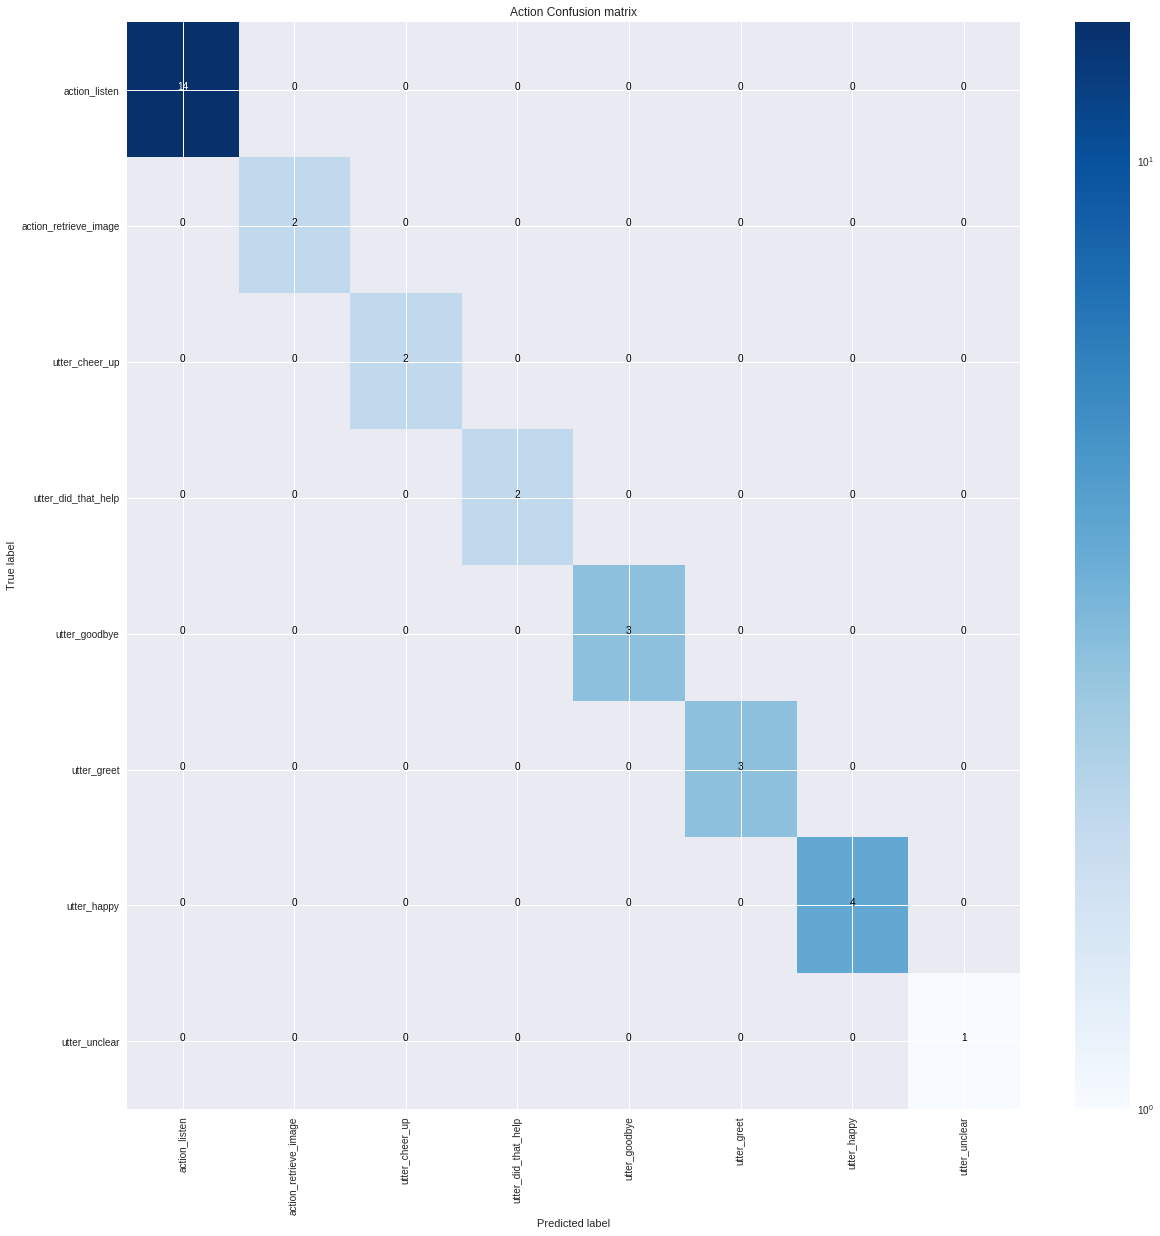

In [30]:
from rasa_core.evaluate import run_story_evaluation
from rasa_core.agent import Agent

_agent = Agent.load('model/dialouge')

run_story_evaluation('stories.md', _agent, max_stories=None, out_directory='.', fail_on_prediction_errors=False, use_e2e=False)
